<a href="https://colab.research.google.com/github/deborahmasibo/Moringa-Core-Module-2-Week-4-IP/blob/main/Naive_Bayes_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Email Filtering

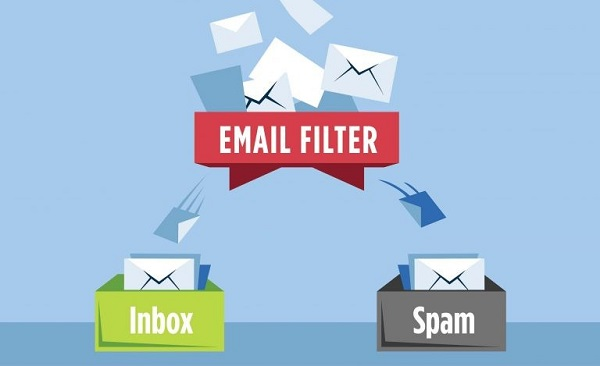

## 1. Defining the Question

### a) Specifying the Question

Spam emails (junk email) are unsolicites messages sent in bulk by email. They can be sent by real humans, but is more often sent by a [botnet](https://www.techtarget.com/searchsecurity/definition/botnet). 

Spams not only clatter the email inbox, but can also be used to trick potential victims into downloading malware, sharing data or sending money.

These emails are almost always commercial, as spammers try to promote and sell questionable goods, make false claims or to deceive recipients into believing someting that is not true [link](https://www.techtarget.com/searchsecurity/definition/spam).


The main purpose of this project is to develop a model that accurately filters(predicts) the type of email based on the word frequencies of email messages. Words frequently used in spam emails will also be determined.

### b) Defining the Metric for Success

Attaining a model accuracy of 80% after optimization, and a weighted F1 score > 0.8.

### c) Understanding the context 

Email filtering is dependent on correclty identifying words that are frequenlty used in spam emails, so that they are flagged moved to the spam section of the email inbox.

Most languages have a large number of words, and emails messages always vary, therefore, the lowest model accuracy will be set to 80%, to cater for this variation, while ensuring that most, if not all spams emails are identified.

### d) Recording the Experimental Design

The following list depicts the steps to be undertaken during the project.

1. Data sourcing/loading.
2. Data Understanding
3. Data Relevance
4. External Dataset Validation
5. Data Preperation
6. Univariate Analysis
7. Bivariate Analysis
8. Multivariate Analysis
9. Modeling: Naive Bayes Classification

10. Implementing the solution
11. Challenging the solution
12. Conclusion
13. Follow up questions.


### e) Data Relevance

1. The data should have variables that adequately contribute to predicting the email category (detecting/predcting spam emails).
2. The dataset should lead to a high model fit (high accuracy, after all possible model optimization procedures have been applied.

## 2. Data Understanding

In [4]:
# Imports
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, Normalizer, MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import  r2_score, f1_score, precision_score, recall_score, classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB, CategoricalNB
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
import os
# Using seaborn style defaults and setting the default figure size
sns.set(rc={'figure.figsize':(30, 5)})
from warnings import filterwarnings
filterwarnings('ignore')
%matplotlib inline

In [5]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Accessing working directory
os.chdir('/content/drive/My Drive/Core/Machine Learning/Moringa Core Module 2 Week 4 IP/spambase')

Mounted at /content/drive


### a) Reading the Data

In [6]:
# Dataset loading
spam = pd.read_csv('spambase.data')

### b) Checking the Data

**Number of Records**

In [7]:
# Number of rows and columns
print(f'Spam dataset records= {spam.shape[0]} and columns = {spam.shape[1]}')

Spam dataset records= 4600 and columns = 58


**Top Dataset Preview**

In [8]:
# First 5 records
spam.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


**Bottom Dataset Preview**

In [9]:
# Last 5 records
spam.tail()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
4595,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,...,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4596,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4597,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4598,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,...,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4599,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


The initial preview does not reveal any anomalies.

### c) Checking Datatypes

In [10]:
# Dataset infromation
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4600 non-null   float64
 1   0.64    4600 non-null   float64
 2   0.64.1  4600 non-null   float64
 3   0.1     4600 non-null   float64
 4   0.32    4600 non-null   float64
 5   0.2     4600 non-null   float64
 6   0.3     4600 non-null   float64
 7   0.4     4600 non-null   float64
 8   0.5     4600 non-null   float64
 9   0.6     4600 non-null   float64
 10  0.7     4600 non-null   float64
 11  0.64.2  4600 non-null   float64
 12  0.8     4600 non-null   float64
 13  0.9     4600 non-null   float64
 14  0.10    4600 non-null   float64
 15  0.32.1  4600 non-null   float64
 16  0.11    4600 non-null   float64
 17  1.29    4600 non-null   float64
 18  1.93    4600 non-null   float64
 19  0.12    4600 non-null   float64
 20  0.96    4600 non-null   float64
 21  0.13    4600 non-null   float64
 22  

Datatypes are as required. Furthermore, there are no missing values.

## 3. External Dataset Validation 

The dataset is valid as it has been cited in various research papers [link](https://archive.ics.uci.edu/ml/datasets/Spambase). It is also similar to various Kaggle datasets such as [link](https://www.kaggle.com/venky73/spam-mails-dataset) and [link](https://www.kaggle.com/balaka18/email-spam-classification-dataset-csv).

## 4. Data Preperation

### a) Validation

All columns will be included as, from the data description, they define word frequencies.

### b) Completeness

Confirming that missing values are not present.

**Percentage of missing values**

In [11]:
# Function to find the percentage of missing values
def PercentageMissing(data):
  # Precentage of missing values
  for col in data.columns.tolist():
    missing = data[col].isnull().sum()
    if missing > 0:
      print(f'{col} = {(missing/data.shape[0])*100}%')
    else:
      print('No missing values present')
      break

In [12]:
# Checking for misssing values
PercentageMissing(spam)

No missing values present


### c) Consistency

In [13]:
# Checking for duplicates.
spam.duplicated().any().any()

True

In [14]:
# Percentage number of duplicates
print(f'Duplicates = {(spam.duplicated().sum()/spam.shape[0])* 100}%')

Duplicates = 8.5%


In [15]:
# Duplicates will be dropped
spam.drop_duplicates(inplace = True)

In [16]:
# Confirming changes have been implemented.
spam.duplicated().any().any()

False

There are no duplicates in the dataset.

### d) Uniformity

Checking uniformity of column names.

In [17]:
# Columns
spam.columns

Index(['0', '0.64', '0.64.1', '0.1', '0.32', '0.2', '0.3', '0.4', '0.5', '0.6',
       '0.7', '0.64.2', '0.8', '0.9', '0.10', '0.32.1', '0.11', '1.29', '1.93',
       '0.12', '0.96', '0.13', '0.14', '0.15', '0.16', '0.17', '0.18', '0.19',
       '0.20', '0.21', '0.22', '0.23', '0.24', '0.25', '0.26', '0.27', '0.28',
       '0.29', '0.30', '0.31', '0.32.2', '0.33', '0.34', '0.35', '0.36',
       '0.37', '0.38', '0.39', '0.40', '0.41', '0.42', '0.778', '0.43', '0.44',
       '3.756', '61', '278', '1'],
      dtype='object')

Creating a dataset with added column names for further analysis.

In [18]:
# Column names
columns = """word_freq_make, word_freq_address, word_freq_all, word_freq_3d, 
word_freq_our, word_freq_over, word_freq_remove, word_freq_internet, 
word_freq_order, word_freq_mail, word_freq_receive, word_freq_will, 
word_freq_people, word_freq_report, word_freq_addresses, word_freq_free,
word_freq_business, word_freq_email, word_freq_you, word_freq_credit,
word_freq_your, word_freq_font, word_freq_000, word_freq_money, word_freq_hp,
word_freq_hpl, word_freq_george, word_freq_650, word_freq_lab, word_freq_labs,
word_freq_telnet, word_freq_857, word_freq_data,  word_freq_415, word_freq_85,
word_freq_technology, word_freq_1999, word_freq_parts, word_freq_pm,
word_freq_direct, word_freq_cs, word_freq_meeting, word_freq_original,
word_freq_project, word_freq_re, word_freq_edu, word_freq_table, 
word_freq_conference, char_freq_;, char_freq_(, char_freq_[, char_freq_!,
char_freq_$, char_freq_#,  capital_run_length_average,
capital_run_length_longest, capital_run_length_total, spam """

From the description, only the spam column is discrete.

In [19]:
# Copy of the dataset
spam_analysis = spam.copy()

In [20]:
# Splitting column names to a list
columns = columns.split(',')
type(columns)

list

In [21]:
# Comparing column name lengths
print(f'Dataset = {len(spam.columns)}')
print(f'Description = {len(columns)}')

Dataset = 58
Description = 58


Columns have the same length therefore, the columns names will be changed according to the columns provided and used for descriptive analysis.

In [22]:
# Changing column names
spam_analysis.columns = columns
# Confirming changes
spam_analysis.columns

Index(['word_freq_make', ' word_freq_address', ' word_freq_all',
       ' word_freq_3d', ' \nword_freq_our', ' word_freq_over',
       ' word_freq_remove', ' word_freq_internet', ' \nword_freq_order',
       ' word_freq_mail', ' word_freq_receive', ' word_freq_will',
       ' \nword_freq_people', ' word_freq_report', ' word_freq_addresses',
       ' word_freq_free', '\nword_freq_business', ' word_freq_email',
       ' word_freq_you', ' word_freq_credit', '\nword_freq_your',
       ' word_freq_font', ' word_freq_000', ' word_freq_money',
       ' word_freq_hp', '\nword_freq_hpl', ' word_freq_george',
       ' word_freq_650', ' word_freq_lab', ' word_freq_labs',
       '\nword_freq_telnet', ' word_freq_857', ' word_freq_data',
       '  word_freq_415', ' word_freq_85', '\nword_freq_technology',
       ' word_freq_1999', ' word_freq_parts', ' word_freq_pm',
       '\nword_freq_direct', ' word_freq_cs', ' word_freq_meeting',
       ' word_freq_original', '\nword_freq_project', ' word_freq_

In [23]:
# Dropping newline escape sequence and white spaces in the column names
columns = [x.replace('\n', '').strip() for x in columns]
# Changing column names
spam_analysis.columns = columns
# Confirming changes
spam_analysis.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


All columns have the same case, therefore, they are uniform and no further editting is required.

### e) Outliers

Checking for outliers.

In [24]:
# Outliers function
def outliers(data):
  # IQR
  Q1, Q3, IQR = 0, 0, 0
  outliers = pd.DataFrame()
  # Numerical columns
  numerical = data.select_dtypes(include = ['int64', 'float64'])
  Q1 = numerical.quantile(0.25)
  Q3 = numerical.quantile(0.75)
  IQR = Q3 - Q1
  # Outliers
  outliers = numerical[((numerical < (Q1 - 1.5 * IQR)) |(numerical > (Q3 + 1.5 * IQR))).any(axis=1)]
  print(f'Number of outliers = {outliers.shape[0]}')
  print(f'Percentage = {(outliers.shape[0]/data.shape[0])*100}%')

In [25]:
# Percentage number of outliers
outliers(spam)

Number of outliers = 4095
Percentage = 97.29151817533857%


Outliers form most of the dataset. This could be caused by the large number of words in the English (inferred from the column names) language. Furthermore, there are a large number of word combinations depending on the intent of the message, therefore, outliers will be retained.

## 5. Descriptive Analysis

### a) Univariate Analysis

#### Categorical

In [26]:
# Categorical Plots
def CatPlots(column, rot, data):
  fig,ax  = plt.subplots(figsize = (20,5))
  sns.countplot(data[column], palette = 'mako', orient = 'v')
  plt.title('Bar Plot -  '+ column, fontsize=20, y = 1.05)
  plt.xticks(rotation = rot)
  plt.xlabel(column, fontsize=15)
  plt.ylabel('Count', fontsize=15)
  for p in ax.patches:
   ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+0.01))
  plt.show()

In [27]:
# Number of unique values per column
for col in spam_analysis.columns.tolist():
  length = len(spam_analysis[col].unique())
  if length < 20:
    print(f'{col}: {length}')

spam: 2


The only categorical column is the spam column.

**Spam**

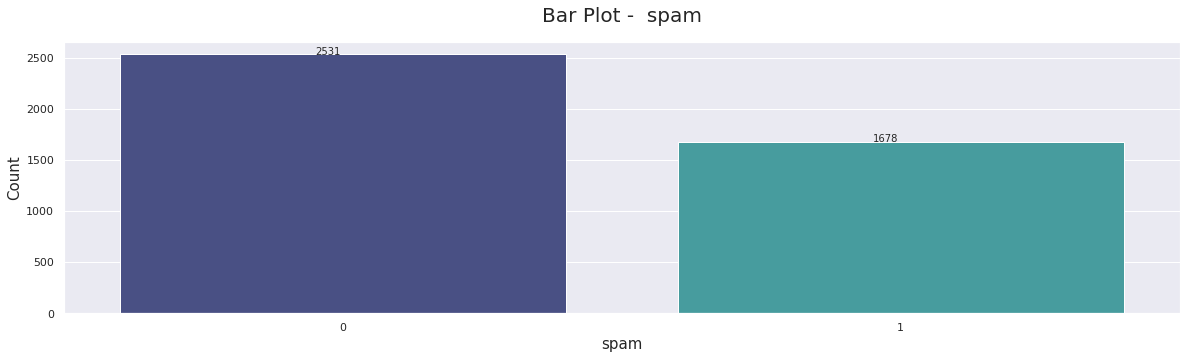

In [28]:
# Email status
CatPlots('spam', 0, spam_analysis)

Most emails were legitimate, however, the number of spam emails were high (more than half the number of the legitimate values).

#### Numerical

Words frequently used in spam emails.

In [29]:
# Word frequency in spam models.
freq = spam_analysis[spam_analysis['spam'] == 1].drop('spam', 1)
max_val = []
min_val = []
columns = freq.columns.tolist()[:-3]
for col in columns:
  max_val.append(freq[col].max())
  min_val.append(freq[col].min())

# Word frequency dataframes
max_freq = pd.DataFrame({'Frequency': max_val}, index = columns).sort_values('Frequency', ascending = False)
min_freq = pd.DataFrame({'Frequency': min_val}, index = columns).sort_values('Frequency')

**Values with the highest frequency**

In [30]:
# Maximum word frequency
max_freq.head(10)

,Frequency
word_freq_3d,42.810
char_freq_#,19.829
word_freq_credit,18.180
word_freq_font,17.100
word_freq_free,16.660
word_freq_money,12.500
word_freq_you,12.500
word_freq_your,11.110
word_freq_internet,11.110
char_freq_(,9.752


* The words present in most spam emails are '3d', 'credit', 'font', 'free', 'money', 'you', 'your' and 'internet'.
* The most frequently used characters in spam emails are '#' and '('.


### b) Bivariate Analysis

#### Numerical - Categorical

In [31]:
# Bar plot function
def BarPlotBiv(x,y, rot, data):
  fig, ax = plt.subplots(figsize = (20,5))
  sns.barplot(data[x], data[y], palette = 'mako')
  plt.title(f'{x} Distribution by {y}'
  , fontsize = 12, y = 1.05)
  plt.xticks(rotation = rot)
  for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
  plt.show()

In [32]:
# Numerical columns
columns = freq.columns.tolist()[-3:]
columns

['capital_run_length_average',
 'capital_run_length_longest',
 'capital_run_length_total']

The feature description can be found here [link](https://myweb.uiowa.edu/pbreheny/data/spam.html).

**Spam Vs Average length of uninterrupted sequences of capital letters**

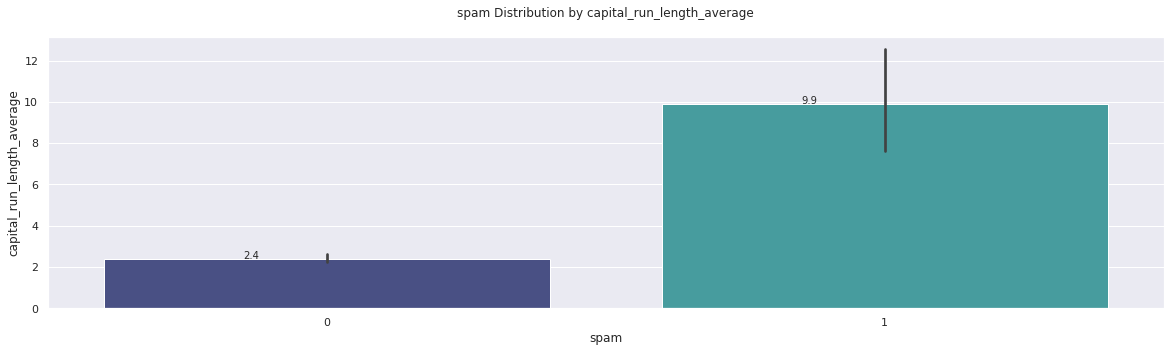

In [33]:
# Bar plot
BarPlotBiv('spam', 'capital_run_length_average', 0, spam_analysis)

Most spam emails have a higher average length of uninterrupted sequences of capital letters than legitimate emails.

**Spam Vs Length of longest uninterrupted sequence of capital letters**

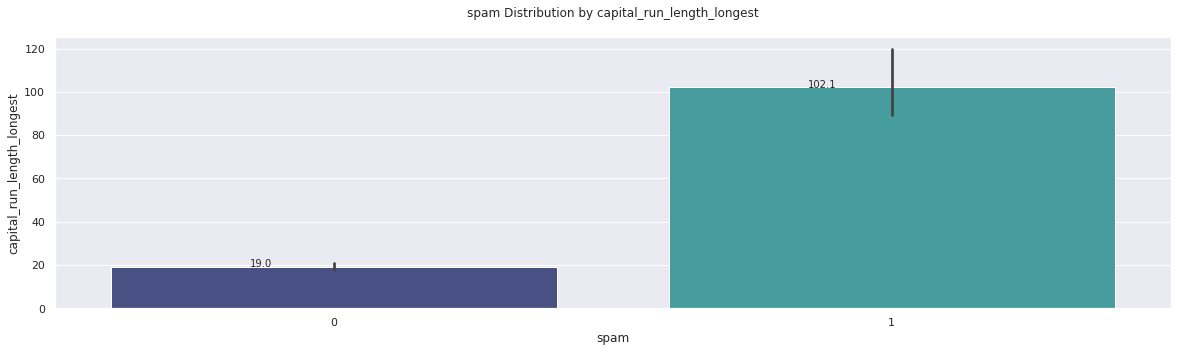

In [34]:
# Bar plot
BarPlotBiv('spam', 'capital_run_length_longest', 0, spam_analysis)

Most spam emails have a higher length of longest uninterrupted sequence of capital letters than legitimate emails.

**Spam Vs Sum of length of uninterrupted sequences of capital letters**

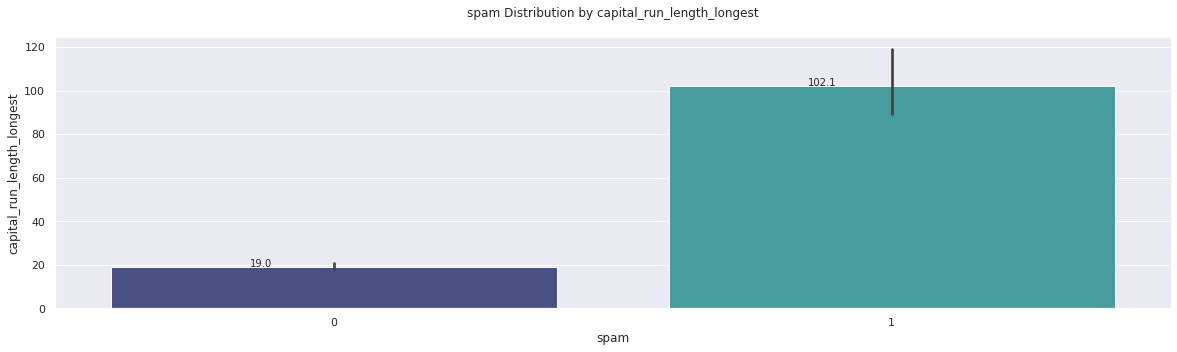

In [35]:
# Bar plot
BarPlotBiv('spam', 'capital_run_length_longest', 0, spam_analysis)

Most spam emails have a higher sum of the length of uninterrupted sequences of capital letters (i.e., the total number of capital letters in the e-mail) than legitimate emails.

### c) Mutlivariate Analalysis

In [36]:
# Correlation Matrix
correlation = spam_analysis.corr()
correlation

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
word_freq_make,1.000000,0.034114,0.063267,0.005384,0.021740,0.055040,0.011037,-0.004392,0.103818,0.040799,...,-0.027262,-0.019680,-0.034798,0.059236,0.101934,-0.009158,0.044779,0.059132,0.084126,0.129321
word_freq_address,0.034114,1.000000,0.027609,-0.008936,0.036983,0.005623,0.077468,0.013781,0.053525,0.184441,...,0.014782,-0.028209,-0.019394,0.031702,0.044449,0.030702,0.029373,0.053866,0.034601,0.100346
word_freq_all,0.063267,0.027609,1.000000,-0.019895,0.065681,0.066608,0.028630,0.007263,0.077618,0.025201,...,-0.036754,-0.024462,-0.035780,0.097231,0.073000,-0.004503,0.095684,0.092511,0.051967,0.172193
word_freq_3d,0.005384,-0.008936,-0.019895,1.000000,0.000256,-0.009167,0.014286,0.003798,-0.001044,-0.003849,...,-0.000030,-0.011450,-0.007516,-0.003861,0.008269,0.000133,0.005754,0.022106,0.023784,0.056407
word_freq_our,0.021740,0.036983,0.065681,0.000256,1.000000,0.041392,0.135958,0.023410,0.014482,0.027232,...,-0.035049,-0.054583,-0.027988,0.019205,0.040696,0.002144,0.050832,0.042985,-0.010498,0.230117
word_freq_over,0.055040,0.005623,0.066608,-0.009167,0.041392,1.000000,0.046844,0.079683,0.097012,0.010068,...,-0.021758,-0.011628,-0.016743,0.058173,0.105903,0.020405,-0.013559,0.065714,0.063402,0.212455
word_freq_remove,0.011037,0.077468,0.028630,0.014286,0.135958,0.046844,1.000000,0.033675,0.049216,0.055670,...,-0.034092,-0.061357,-0.029478,0.051036,0.067215,0.049300,0.039171,0.050828,-0.017082,0.334605
word_freq_internet,-0.004392,0.013781,0.007263,0.003798,0.023410,0.079683,0.033675,1.000000,0.106872,0.079023,...,-0.028986,-0.042785,-0.021393,0.029069,0.053550,-0.008128,0.009974,0.035606,0.036894,0.200780
word_freq_order,0.103818,0.053525,0.077618,-0.001044,0.014482,0.097012,0.049216,0.106872,1.000000,0.123341,...,-0.015016,-0.037420,0.017308,0.035985,0.152436,-0.002084,0.110786,0.166304,0.233199,0.221591
word_freq_mail,0.040799,0.184441,0.025201,-0.003849,0.027232,0.010068,0.055670,0.079023,0.123341,1.000000,...,0.006757,-0.005008,0.003785,0.031657,0.077378,0.034473,0.073125,0.101552,0.078587,0.131822


In [37]:
# Checking for correlation > 0.49 but less than 1.
((correlation > 0.49) & (correlation < 1)).sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  1
word_freq_hpl                 1
word_freq_george              0
word_freq_650                 5
word_freq_lab                 0
word_freq_labs                7
word_freq_telnet              5
word_fre

There are columns with high correlation. Only columns with high VIF will be dropped, and the performance of the resulting and previous dataset compared.

## 6. Modelling

### Variance Inflation Factor

In [38]:
# VIF function
def VIF(data):
  # Correlation matrix
  correlation = data.corr()
  # Inverse matrix
  inv_corr = pd.DataFrame(np.linalg.inv(correlation.values), index = correlation.index, columns=correlation.columns)
  return inv_corr

In [39]:
# High VIF variables
vif = VIF(spam)
# Function to obtain columns with a high VIF.
def Vif(data):
  columns = data.columns.tolist()
  indices = data.index.tolist()
  high_vif = {}
  # Filter out columns with a VIF > 5.
  for index, column in zip(indices, columns):
    if index == column:
      if data.loc[index, column] > 5:
        high_vif[index] = data.loc[index, column]
      else:
        pass
      pass
  return high_vif

# Funtion call results.
Vif(vif)

{'0.23': 102.28948996717291, '0.25': 99.42525520315942}

The columns above have very high VIF values, a dataset without these columns will be created, and the performance to the original dataset with be compared during modelling.

In [40]:
# Dropped columns with high VIF
spam_vif = spam.drop(['0.23', '0.25'], axis = 1)
spam_vif.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


### Function Definition

In [41]:
# Standard scaler
def Standardization(X_train, X_test):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)
  return X_train, X_test

# Normalize
def Normalization(X_train, X_test, l = 'l2'):
  normalizer = Normalizer(norm = l)
  X_train = normalizer.fit_transform(X_train)
  X_test = normalizer.transform(X_test)
  return X_train, X_test

# MinMaxScaler
def MinMax(X_train, X_test):
  minmax = MinMaxScaler()
  X_train = minmax.fit_transform(X_train)
  X_test = minmax.transform(X_test)
  return X_train, X_test

# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
def Lda(X_train, X_test, y_train, components = None):
  lda = LDA(n_components = components)
  X_train = lda.fit_transform(X_train, y_train)
  X_test = lda.transform(X_test)
  return X_train, X_test

# GaussianNB
def GaussianClass(X_train, X_test, y_train, y_test):
  # Classifier
  classifier = GaussianNB()
  # Prediction
  y_pred = classifier.fit(X_train, y_train).predict(X_test)
  # Prediction dataframe
  predictions = pd.DataFrame({'Actual Values': y_test.flatten(), 'Predicted Values': y_pred.flatten()})
  print('Predictions\n')
  print(predictions.head())
  # Metrics
  # Weighted F1 Score
  f1 = f1_score(y_test, y_pred, average = 'weighted')  
  # Print mean
  mean = np.mean(y_pred == y_test)
  print(f'\n{"*"*70}\n')
  print(f'\nMean = {mean}')
  print(f'Weighted F1 Score: {f1}')
  # Classification Report
  report = classification_report(y_test, y_pred)
  print(f'\n{"*"*70}\n') 
  print('Classification report\n')
  print(report)
  print(f'\n{"*"*70}\n')
  matrix_display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                          display_labels=classifier.classes_,
                                          cmap = 'Blues')
  plt.grid(False)
  plt.title('Confusion Matrix' , y = 1.05)
  plt.show()

# GaussianNB
def GaussianClass_Pred (X_train, X_test, y_train, pred, actual):
  # Classifier
  classifier = GaussianNB()
  # Prediction
  y_pred = classifier.fit(X_train, y_train).predict(pred)
  print(f'Actual: {actual}')
  print(f'Prediction: {y_pred}')

# GaussianNB
def GaussianClass_Acutal_Pred(X_train, X_test, y_train, pred):
  # Classifier
  classifier = GaussianNB()
  # Prediction
  y_pred = classifier.fit(X_train, y_train).predict(pred)
  print('Predictions')
  print(f'{y_pred[:5]}')

In [42]:
# MultinomialNB
def MultinomialClass(X_train, X_test, y_train, y_test):
  # Classifier
  classifier = MultinomialNB()
  # Prediction
  y_pred = classifier.fit(X_train, y_train).predict(X_test)
  # Prediction dataframe
  predictions = pd.DataFrame({'Actual Values': y_test.flatten(), 'Predicted Values': y_pred.flatten()})
  print('Predictions\n')
  print(predictions.head())
  # Metrics
  # Weighted F1 Score
  f1 = f1_score(y_test, y_pred, average = 'weighted')  
  # Print mean
  mean = np.mean(y_pred == y_test)
  print(f'\n{"*"*70}\n')
  print(f'Mean = {mean}')
  print(f'Weighted F1 Score: {f1}')
  # Classification Report
  report = classification_report(y_test, y_pred)
  print(f'\n{"*"*70}\n') 
  print('Classification report\n')
  print(report)
  print(f'\n{"*"*70}\n')
  matrix_display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                          display_labels=classifier.classes_,
                                          cmap = 'Blues')
  plt.grid(False)
  plt.title('Confusion Matrix' , y = 1.05)
  plt.show()

# Prediction
def MultinomialClass_Pred(X_train, X_test, y_train, pred, actual):
  # Classifier
  classifier = MultinomialNB()
  # Prediction
  y_pred = classifier.fit(X_train, y_train).predict(pred)
  print(f'Actual: {actual}')
  print(f'Prediction: {y_pred}')

  # GaussianNB
def MultinomialClass_Acutal_Pred(X_train, X_test, y_train, pred):
  # Classifier
  classifier = MultinomialNB()
  # Prediction
  y_pred = classifier.fit(X_train, y_train).predict(pred)
  print('Predictions')
  print(f'{y_pred[:5]}')

In [43]:
# BernoulliNB
def BernoulliClass(X_train, X_test, y_train, y_test, a = 1.0):
  # Classifier
  classifier = BernoulliNB(alpha = a)
  # Prediction
  y_pred = classifier.fit(X_train, y_train).predict(X_test)
  # Prediction dataframe
  predictions = pd.DataFrame({'Actual Values': y_test.flatten(), 'Predicted Values': y_pred.flatten()})
  print('Predictions\n')
  print(predictions.head())
  # Metrics
  # Weighted F1 Score
  f1 = f1_score(y_test, y_pred, average = 'weighted')  
  # Print mean
  mean = np.mean(y_pred == y_test)
  print(f'\n{"*"*70}\n')
  print(f'\nMean = {mean}')
  print(f'Weighted F1 Score: {f1}')
  # Classification Report
  report = classification_report(y_test, y_pred)
  print(f'\n{"*"*70}\n') 
  print('Classification report\n')
  print(report)
  print(f'\n{"*"*70}\n')
  matrix_display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                          display_labels=classifier.classes_,
                                          cmap = 'Blues')
  plt.grid(False)
  plt.title('Confusion Matrix' , y = 1.05)
  plt.show()

# Prediction
def BernoulliClass_Pred(X_train, X_test, y_train, pred, actual, a = 1.0):
  # Classifier
  classifier = BernoulliNB(aplha = a)
  # Prediction
  y_pred = classifier.fit(X_train, y_train).predict(pred)
  print(f'Actual: {actual}')
  print(f'Prediction: {y_pred}')

# Prediction
def BernoulliClass_Actual_Pred(X_train, X_test, y_train, y_test, a = 1.0):
  # Classifier
  classifier = BernoulliNB(alpha = a)
  # Prediction
  y_pred = classifier.fit(X_train, y_train).predict(X_test)
  print('Predictions\n')
  df = pd.DataFrame({'Actual Values': y_test.flatten(), 'Predicted Values': y_pred.flatten()})
  print(df)
  # Metrics
  # Weighted F1 Score
  f1 = f1_score(y_test, y_pred, average = 'weighted')  
  # Print mean
  mean = np.mean(y_pred == y_test)
  print(f'\n{"*"*70}\n')
  print(f'Weighted F1 Score: {f1}')
  # Classification Report
  report = classification_report(y_test, y_pred)
  print(f'\n{"*"*70}\n') 
  print('Classification report\n')
  print(report)
  print(f'\n{"*"*70}\n')
  matrix_display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                          display_labels=classifier.classes_,
                                          cmap = 'Blues')
  plt.grid(False)
  plt.title('Confusion Matrix' , y = 1.05)
  plt.show()

# Feature importance function
def Importances_Class(X_train, X_test, y_train, y_test, f, n = 100,
                      depth= None, split = 2):
  # Classifier
  tree = RandomForestClassifier(n_estimators = n, random_state=0,
                                min_samples_split = split, max_depth= depth)
  # Train it on our training set.
  tree.fit(X_train, y_train)
  # Prediction
  y_pred = tree.predict(X_test)  
  # Importances
  importances = list(tree.feature_importances_)
  # Features
  feat = []
  imp = []
  # Dataframe
  df = pd.DataFrame()
  for feature, importance in zip(f, importances):
    feat.append(feature)
    imp.append(importance)
  df['features'] = feat
  df['importance'] = imp
  df.sort_values('importance', ascending = False, inplace = True)

  # Bar chart
  values = list(range(len(imp)))
  fig, ax = plt.subplots(figsize = (15, 5))
  plt.bar(feat, imp)
  # Tick labels for x axis
  plt.xticks(values, f, rotation='vertical')
  # Axis labels and title
  plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');


### 80 - 20 Train-Test-Split

In [44]:
# Features and label
X = spam.drop('1', axis = 1).values
y = spam['1'].values.reshape(-1, 1)
# 80-20 train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [45]:
# Features and label for spam_vif dataset
Xv = spam_vif.drop('1', axis = 1).values
yv = spam_vif['1'].values.reshape(-1, 1)
# 80-20 train-test-split
Xv_train, Xv_test, yv_train, yv_test = train_test_split(Xv, yv, test_size = 0.2, random_state = 0)

#### 1. GaussianNB

**Performance without scaling and dataset selection**

Predictions

   Actual Values  Predicted Values
0              0                 0
1              0                 0
2              0                 1
3              1                 1
4              0                 0

**********************************************************************


Mean = 0.4874746813660496
Weighted F1 Score: 0.8152172304417641

**********************************************************************

Classification report

              precision    recall  f1-score   support

           0       0.97      0.71      0.82       495
           1       0.70      0.97      0.81       347

    accuracy                           0.81       842
   macro avg       0.83      0.84      0.81       842
weighted avg       0.86      0.81      0.82       842


**********************************************************************



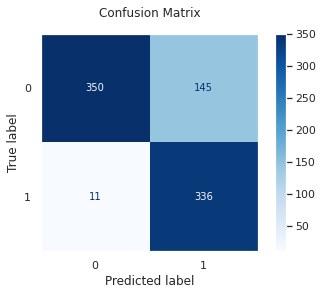

In [108]:
# Dataset with all features
GaussianClass(X_train, X_test, y_train, y_test)

An accuracy of 81% is attained.

Predictions

   Actual Values  Predicted Values
0              0                 0
1              0                 0
2              0                 1
3              1                 1
4              0                 0

**********************************************************************


Mean = 0.48830970260831297
Weighted F1 Score: 0.8200735382055973

**********************************************************************

Classification report

              precision    recall  f1-score   support

           0       0.97      0.72      0.82       495
           1       0.70      0.97      0.82       347

    accuracy                           0.82       842
   macro avg       0.84      0.84      0.82       842
weighted avg       0.86      0.82      0.82       842


**********************************************************************



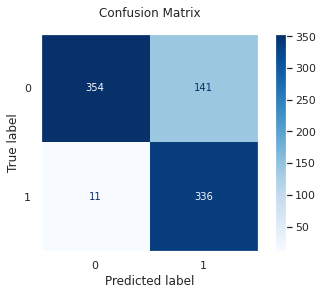

In [109]:
# Dataset with colums with high VIF dropped
GaussianClass(Xv_train, Xv_test, yv_train, yv_test)

The accuracy is higher by 1%, therefore, the second dataset will be used.

**Feature Importance**

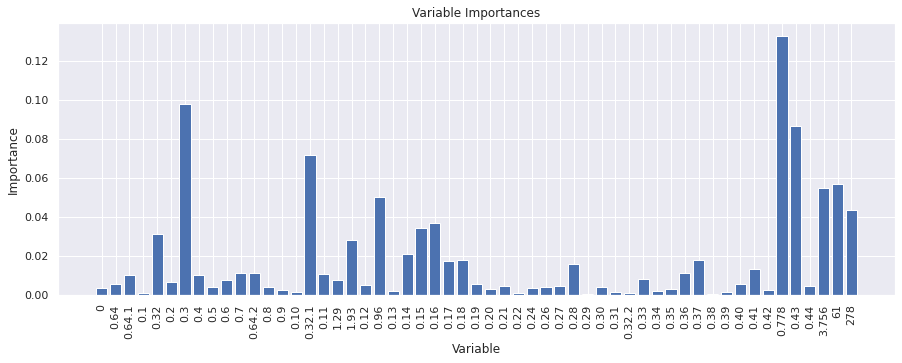

In [46]:
f = spam_vif.drop('1', 1).columns.tolist()
Importances_Class(Xv_train, Xv_test, yv_train, yv_test, f, n = 100,
                      depth= None, split = 2)

Though there are words that have the high importance, in order to properly filter junk email, all possible words will be considered, therefore, columns will not be excluded from the feature set.

**Rescaling**

Comparing scaling metric performance.

Standardization

Predictions

   Actual Values  Predicted Values
0              0                 0
1              0                 0
2              0                 1
3              1                 1
4              0                 0

**********************************************************************


Mean = 0.4893534791611422
Weighted F1 Score: 0.823758524841825

**********************************************************************

Classification report

              precision    recall  f1-score   support

           0       0.97      0.72      0.83       495
           1       0.71      0.97      0.82       347

    accuracy                           0.82       842
   macro avg       0.84      0.84      0.82       842
weighted avg       0.86      0.82      0.82       842


**********************************************************************



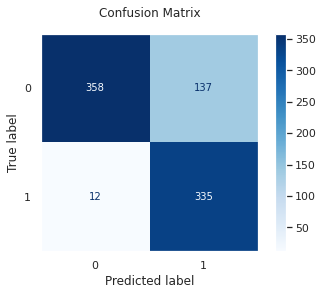

In [ ]:
# Standardization
Xs_train, Xs_test = Standardization(Xv_train, Xv_test)
# GaussianNB
GaussianClass(Xs_train, Xs_test, yv_train, yv_test)

The accuracy obtained with standardization is 82%.

MinMax scaling

Predictions

   Actual Values  Predicted Values
0              0                 0
1              0                 0
2              0                 1
3              1                 1
4              0                 0

**********************************************************************


Mean = 0.4893534791611422
Weighted F1 Score: 0.823758524841825

**********************************************************************

Classification report

              precision    recall  f1-score   support

           0       0.97      0.72      0.83       495
           1       0.71      0.97      0.82       347

    accuracy                           0.82       842
   macro avg       0.84      0.84      0.82       842
weighted avg       0.86      0.82      0.82       842


**********************************************************************



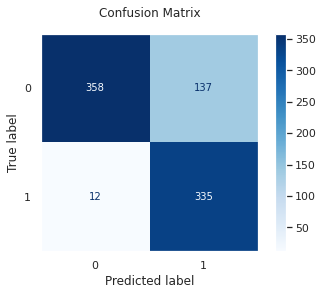

In [ ]:
# MinMax
Xmm_train, Xmm_test = MinMax(Xv_train, Xv_test)
# GaussianNB
GaussianClass(Xmm_train, Xmm_test, yv_train, yv_test)

The accuracy of 82% is retained. Standardization and MinMax scaling of the features lead to similar model performance.

Normalization

Predictions

   Actual Values  Predicted Values
0              0                 0
1              0                 1
2              0                 1
3              1                 1
4              0                 1

**********************************************************************


Mean = 0.4820470432913378
Weighted F1 Score: 0.7665903675447087

**********************************************************************

Classification report

              precision    recall  f1-score   support

           0       0.95      0.64      0.76       495
           1       0.65      0.95      0.77       347

    accuracy                           0.77       842
   macro avg       0.80      0.79      0.77       842
weighted avg       0.82      0.77      0.77       842


**********************************************************************



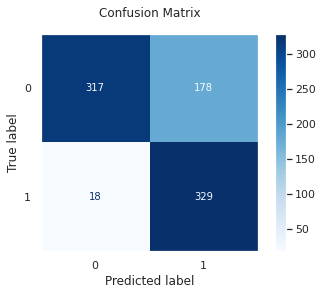

In [ ]:
# Normalization
Xn_train, Xn_test = Normalization(Xv_train, Xv_test)
# GaussianNB
GaussianClass(Xn_train, Xn_test, yv_train, yv_test)

With normalization, accuracy drops to 77%.

Therefore, for GaussianNB, the model trained with stanndardized features will be used.

#### 2. MutlinomialNB

Performance without scaling.

Predictions

   Actual Values  Predicted Values
0              0                 0
1              0                 0
2              0                 0
3              1                 1
4              0                 0

**********************************************************************

Mean = 0.5219193076094132
Weighted F1 Score: 0.7904577876761847

**********************************************************************

Classification report

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       495
           1       0.77      0.70      0.74       347

    accuracy                           0.79       842
   macro avg       0.79      0.78      0.78       842
weighted avg       0.79      0.79      0.79       842


**********************************************************************



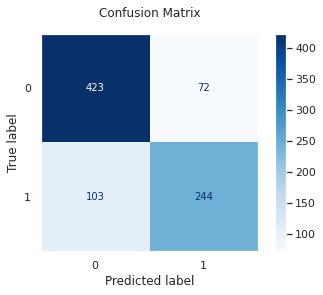

In [ ]:
# Dataset with all features
MultinomialClass(X_train, X_test, y_train, y_test)

The accuracy attained is 79%.

Predictions

   Actual Values  Predicted Values
0              0                 0
1              0                 0
2              0                 0
3              1                 1
4              0                 0

**********************************************************************

Mean = 0.5219193076094132
Weighted F1 Score: 0.7880630195353409

**********************************************************************

Classification report

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       495
           1       0.77      0.70      0.73       347

    accuracy                           0.79       842
   macro avg       0.79      0.78      0.78       842
weighted avg       0.79      0.79      0.79       842


**********************************************************************



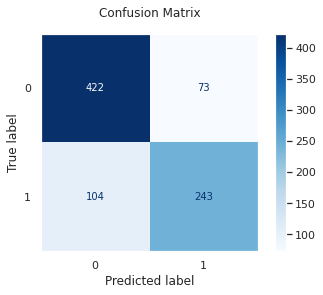

In [ ]:
# Dataset with colums with high VIF dropped
MultinomialClass(Xv_train, Xv_test, yv_train, yv_test)

The accuracy remains the same, however, the first dataset has a higher F1 score. Therefore, it will be implemented.

MinMax Scaling

The normalized and standardized features have negative values, which cause MultinomialNB to fail, therefore, MinMax scaling will be used to restrict scaling to [0,1].

Predictions

   Actual Values  Predicted Values
0              0                 0
1              0                 0
2              0                 0
3              1                 1
4              0                 0

**********************************************************************

Mean = 0.52609441382073
Weighted F1 Score: 0.8951079461256713

**********************************************************************

Classification report

              precision    recall  f1-score   support

           0       0.87      0.96      0.92       495
           1       0.94      0.80      0.86       347

    accuracy                           0.90       842
   macro avg       0.91      0.88      0.89       842
weighted avg       0.90      0.90      0.90       842


**********************************************************************



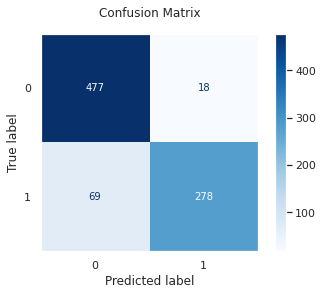

In [ ]:
# With MinMaxScaler
Xm_train, Xm_test = MinMax(X_train, X_test)
MultinomialClass(Xm_train, Xm_test, y_train, y_test)

The original dataset attains a high accuracy of 90%.

#### 3. BernoulliNB

Performance without scaling

Predictions

   Actual Values  Predicted Values
0              0                 0
1              0                 0
2              0                 0
3              1                 1
4              0                 0

**********************************************************************


Mean = 0.5223368182305449
Weighted F1 Score: 0.8837805045283192

**********************************************************************

Classification report

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       495
           1       0.90      0.81      0.85       347

    accuracy                           0.88       842
   macro avg       0.89      0.87      0.88       842
weighted avg       0.89      0.88      0.88       842


**********************************************************************



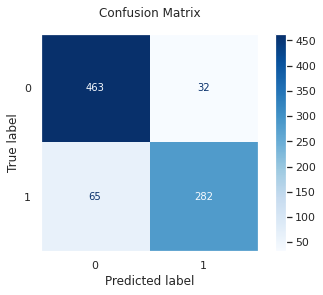

In [ ]:
# Dataset with all features
BernoulliClass(X_train, X_test, y_train, y_test)

An accuracy of 88% is attained.

Predictions

   Actual Values  Predicted Values
0              0                 0
1              0                 0
2              0                 0
3              1                 1
4              0                 0

**********************************************************************


Mean = 0.5225455735411106
Weighted F1 Score: 0.8825447870555316

**********************************************************************

Classification report

              precision    recall  f1-score   support

           0       0.88      0.94      0.90       495
           1       0.90      0.81      0.85       347

    accuracy                           0.88       842
   macro avg       0.89      0.87      0.88       842
weighted avg       0.88      0.88      0.88       842


**********************************************************************



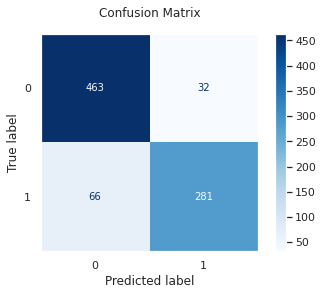

In [ ]:
# Dataset with colums with high VIF dropped
BernoulliClass(Xv_train, Xv_test, yv_train, yv_test)

The same accuracy is attained, however, the F1 score drops slighly, therefore, the first dataset will be used.

Standardization

Predictions

   Actual Values  Predicted Values
0              0                 0
1              0                 0
2              0                 0
3              1                 1
4              0                 0

**********************************************************************


Mean = 0.5212930416777156
Weighted F1 Score: 0.8995123996687305

**********************************************************************

Classification report

              precision    recall  f1-score   support

           0       0.89      0.94      0.92       495
           1       0.91      0.84      0.87       347

    accuracy                           0.90       842
   macro avg       0.90      0.89      0.90       842
weighted avg       0.90      0.90      0.90       842


**********************************************************************



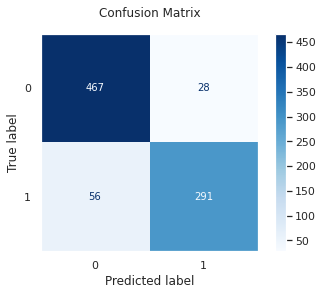

In [ ]:
# Standardization
Xs_train, Xs_test = Standardization(X_train, X_test)
# GaussianNB
BernoulliClass(Xs_train, Xs_test, y_train, y_test)

For the original dataset, a high accuracy of 90% is attained.

Predictions

   Actual Values  Predicted Values
0              0                 0
1              0                 0
2              0                 0
3              1                 1
4              0                 0

**********************************************************************


Mean = 0.5219193076094132
Weighted F1 Score: 0.9006171221549903

**********************************************************************

Classification report

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       495
           1       0.92      0.84      0.87       347

    accuracy                           0.90       842
   macro avg       0.90      0.89      0.90       842
weighted avg       0.90      0.90      0.90       842


**********************************************************************



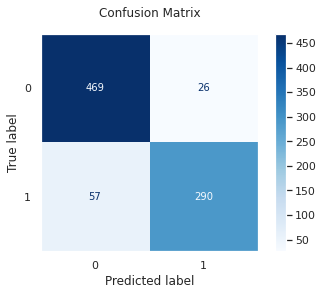

In [ ]:
# Standardization - VIF dataset
Xs_train, Xs_test = Standardization(Xv_train, Xv_test)
# GaussianNB
BernoulliClass(Xs_train, Xs_test, yv_train, yv_test)

For the dataset with high VIF columns dropped, the accuracy remains the same, however, the F1 score is higher.

MinMax Scaling

Predictions

   Actual Values  Predicted Values
0              0                 0
1              0                 0
2              0                 0
3              1                 1
4              0                 0

**********************************************************************


Mean = 0.522128062919979
Weighted F1 Score: 0.8850150756875307

**********************************************************************

Classification report

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       495
           1       0.90      0.82      0.85       347

    accuracy                           0.89       842
   macro avg       0.89      0.88      0.88       842
weighted avg       0.89      0.89      0.89       842


**********************************************************************



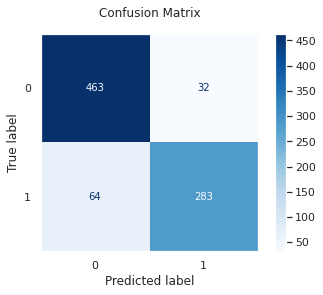

In [ ]:
# MinMax
Xmm_train, Xmm_test = MinMax(X_train, X_test)
# GaussianNB
BernoulliClass(Xmm_train, Xmm_test, y_train, y_test)

The original dataset attains an accuracy of 89%.

Predictions

   Actual Values  Predicted Values
0              0                 0
1              0                 0
2              0                 0
3              1                 1
4              0                 0

**********************************************************************


Mean = 0.5223368182305449
Weighted F1 Score: 0.8837805045283192

**********************************************************************

Classification report

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       495
           1       0.90      0.81      0.85       347

    accuracy                           0.88       842
   macro avg       0.89      0.87      0.88       842
weighted avg       0.89      0.88      0.88       842


**********************************************************************



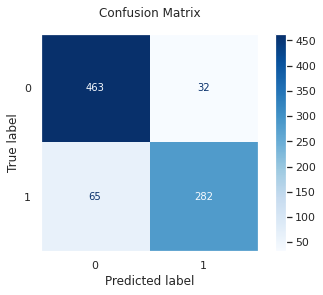

In [ ]:
# Normalization
Xn_train, Xn_test = Normalization(X_train, X_test)
# GaussianNB
BernoulliClass(Xn_train, Xn_test, y_train, y_test)

For the original dataset, a higher accuracy of 88% is attained.

#### Model Performance

The following models had the highest performance for the three Naive Bayes algorithms.

*GaussianNB*
1. Dataset with high VIF columns dropped.
2. Standardization and MinMax scaler.
3. Accuracy = 82%.
4. Weighted F1 Score = 0.8237.

*MultinomialNB*
1. Original dataset.
2. MinMax scaler.
3. Accuracy = 90%.
4. Weighted F1 Score = 0.8951.

*BernoulliNB*
1. Dataset with high VIF columns dropped.
2. Standardization.
3. Accuracy = 90%.
4. Weighted F1 Score = 0.9006.

The BernoulliNB model had a high accuracy of 90%, and a high weighted F1 score of 0.9. This models will become the base model.


### 70 - 30 Train-Test-Split

The Bernoulli base model will be implemented.

In [117]:
# Features and label for spam_vif dataset
Xv73 = spam_vif.drop('1', axis = 1).values
yv73 = spam_vif['1'].values.reshape(-1, 1)
# 70-30 train-test-split
Xv73_train, Xv73_test, yv73_train, yv73_test = train_test_split(Xv73, yv73, test_size = 0.3, random_state = 0)

Predictions

   Actual Values  Predicted Values
0              0                 0
1              0                 0
2              0                 0
3              1                 1
4              0                 0

**********************************************************************


Mean = 0.5208332157909288
Weighted F1 Score: 0.9009411820863803

**********************************************************************

Classification report

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       737
           1       0.92      0.83      0.88       526

    accuracy                           0.90      1263
   macro avg       0.91      0.89      0.90      1263
weighted avg       0.90      0.90      0.90      1263


**********************************************************************



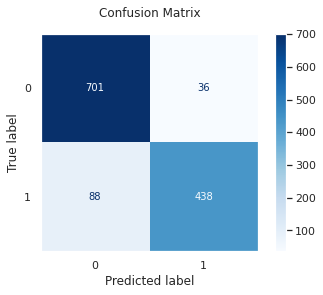

In [118]:
# Standardization - VIF dataset
Xs_train, Xs_test = Standardization(Xv73_train, Xv73_test)
# GaussianNB
BernoulliClass(Xs_train, Xs_test, yv73_train, yv73_test)

The accuracy remains the same, but the weighted F1 score inceases to 0.9009.

### 60 - 40 Train-Test-Split

In [121]:
# Features and label for spam_vif dataset
Xv64 = spam_vif.drop('1', axis = 1).values
yv64 = spam_vif['1'].values.reshape(-1, 1)
# 70-30 train-test-split
Xv64_train, Xv64_test, yv64_train, yv64_test = train_test_split(Xv64, yv64, test_size = 0.4, random_state = 0)

Predictions

   Actual Values  Predicted Values
0              0                 0
1              0                 0
2              0                 0
3              1                 1
4              0                 0

**********************************************************************


Mean = 0.5244412974424654
Weighted F1 Score: 0.9015678377319875

**********************************************************************

Classification report

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       994
           1       0.93      0.83      0.87       690

    accuracy                           0.90      1684
   macro avg       0.91      0.89      0.90      1684
weighted avg       0.90      0.90      0.90      1684


**********************************************************************



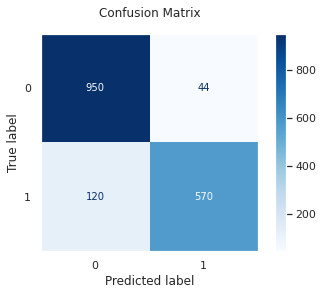

In [122]:
# Standardization - VIF dataset
Xs_train, Xs_test = Standardization(Xv64_train, Xv64_test)
# GaussianNB
BernoulliClass(Xs_train, Xs_test, yv64_train, yv64_test)

The accuracy is constant, but the F1 score inceases 0.9016. 

As seen earlier, marjority of the dataset records are outliers, therefore, decreasing the training set size decreases the number of outliers present in the set. This enables the model to derive patterns from the data better.

The 60 - 40 split train and test sets lead to the highest weighted F1 score as the accuracy remains the same. Therefore, it will be used in the optimization and solution implementation stages.

### Model Optimization

#### 1. LDA

LDA will be implemented to see if the performance improves.

Predictions

   Actual Values  Predicted Values
0              0                 0
1              0                 0
2              0                 0
3              1                 1
4              0                 0

**********************************************************************


Mean = 0.5144718208540914
Weighted F1 Score: 0.905749250395327

**********************************************************************

Classification report

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       994
           1       0.88      0.90      0.89       690

    accuracy                           0.91      1684
   macro avg       0.90      0.90      0.90      1684
weighted avg       0.91      0.91      0.91      1684


**********************************************************************



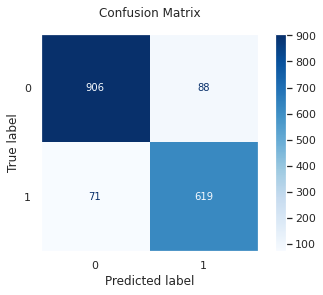

In [123]:
# Components = all

# Standardization - VIF dataset
Xs_train, Xs_test = Standardization(Xv64_train, Xv64_test)
# LDA
Xs_train, Xs_test = Lda(Xs_train, Xs_test, yv64_train)
# BernoulliNB
BernoulliClass(Xs_train, Xs_test, yv64_train, yv64_test)

* Applying LDA increases the model accuracy to 91%, the weighted F1 score also increases. 
* LDA focuses on finding a feature subspace that maximizes the separability between the groups [link](https://towardsai.net/p/data-science/lda-vs-pca). Therefore, the model was able to generalize the data better after LDA was implemeted.

Predictions

   Actual Values  Predicted Values
0              0                 0
1              0                 0
2              0                 0
3              1                 1
4              0                 0

**********************************************************************


Mean = 0.5144718208540914
Weighted F1 Score: 0.905749250395327

**********************************************************************

Classification report

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       994
           1       0.88      0.90      0.89       690

    accuracy                           0.91      1684
   macro avg       0.90      0.90      0.90      1684
weighted avg       0.91      0.91      0.91      1684


**********************************************************************



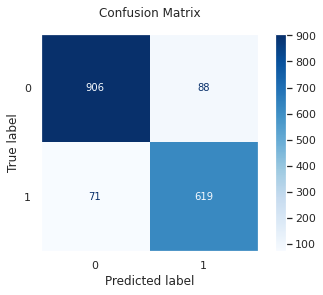

In [124]:
# Components = 1

# Standardization - VIF dataset
Xs_train, Xs_test = Standardization(Xv64_train, Xv64_test)
# LDA
Xs_train, Xs_test = Lda(Xs_train, Xs_test, yv64_train, components = 1)
# bernoulliNB
BernoulliClass(Xs_train, Xs_test, yv64_train, yv64_test)

* As the label only contans 2 classes, the maximum number of components for min(n_features, n_classes - 1), will be min(10, (2-1)) = 1.
* The accuracy and F1 scores remain the same. Therefore, all components will be considered.


#### 2. Hyperparameter Tuning

Hyperparameter tunig will be implemented to find optimal model values, and to observe if smoothing will improve the base model's performance.

In [125]:
# Grid search function
def Grid(X, y, params, scoring = 'accuracy', folds = 5):
  # Standardization
  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  # LDA
  lda = LDA(n_components = None)
  X = lda.fit_transform(X, y)

  # Classifier
  classifier = BernoulliNB()

  # Grid search
  grid = GridSearchCV(classifier, param_grid = params, scoring = scoring,
                      cv = folds, verbose = 1, n_jobs = -1)
  # Hyperparameter tuning
  grid.fit(X, y)
  # Best parameters
  print(f'Best parameters: {grid.best_params_}')
  # Best scores
  print(f'Best scores: {grid.best_score_}')

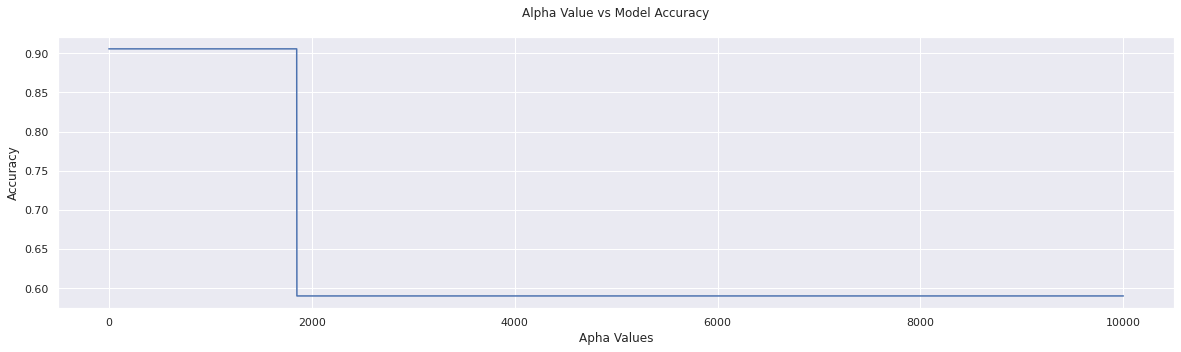

In [126]:
# Optimal alpha values

# Standardization - VIF dataset
Xs_train, Xs_test = Standardization(Xv64_train, Xv64_test)
# LDA
Xs_train, Xs_test = Lda(Xs_train, Xs_test, yv64_train)

# Plotting model accuracy vs number of K values
# Placeholder for model accuaries
accuracies = []
# Obtaining accuracies for different alpha values
for a in range(0, 10001):
  
    #Train Model and Predict  
    classifier = BernoulliNB(alpha = a).fit(Xs_train, yv64_train)
    y_pred= classifier.predict(Xs_test)
    accuracies.append(accuracy_score(yv64_test, y_pred))

# Line plot
fig, ax = plt.subplots(figsize = (20, 5))
plt.plot(range(0, 10001), accuracies)
plt.title('Alpha Value vs Model Accuracy', y = 1.05)
plt.xlabel('Apha Values')
plt.ylabel('Accuracy')
plt.show()

The optimal smoothing values with a high accuracy of around 90%, lie in the range of 0 to before 2000.

In [127]:
# Hyperparameter grid
grid_params = {
    'alpha' : np.arange(2000).tolist()
}

In [128]:
# Hyperparameter tuning
# Balanced accuracy
Grid(X = Xv64, y = yv64, params = grid_params, scoring = 'balanced_accuracy', folds = 10)

Fitting 10 folds for each of 2000 candidates, totalling 20000 fits
Best parameters: {'alpha': 0}
Best scores: 0.9083001037322112


In [129]:
# Hyperparameter tuning
# Accuracy
Grid(Xv64, yv64, params = grid_params, scoring = 'accuracy', folds = 10)

Fitting 10 folds for each of 2000 candidates, totalling 20000 fits
Best parameters: {'alpha': 0}
Best scores: 0.9116061531500963


Predictions

   Actual Values  Predicted Values
0              0                 0
1              0                 0
2              0                 0
3              1                 1
4              0                 0

**********************************************************************


Mean = 0.5144718208540914
Weighted F1 Score: 0.905749250395327

**********************************************************************

Classification report

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       994
           1       0.88      0.90      0.89       690

    accuracy                           0.91      1684
   macro avg       0.90      0.90      0.90      1684
weighted avg       0.91      0.91      0.91      1684


**********************************************************************



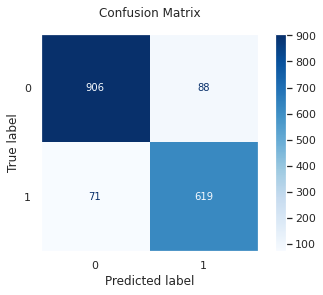

In [130]:
# Implementing selected hyperparamers
# Components = all

# Standardization - VIF dataset
Xs_train, Xs_test = Standardization(Xv64_train, Xv64_test)
# LDA
Xs_train, Xs_test = Lda(Xs_train, Xs_test, yv64_train)
# BernoulliNB
BernoulliClass(Xs_train, Xs_test, yv64_train, yv64_test, a = 0.0)

The accuracy remains the same.

Checking performance with inceased alpha values.

Predictions

   Actual Values  Predicted Values
0              0                 0
1              0                 0
2              0                 0
3              1                 1
4              0                 0

**********************************************************************


Mean = 0.5144718208540914
Weighted F1 Score: 0.905749250395327

**********************************************************************

Classification report

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       994
           1       0.88      0.90      0.89       690

    accuracy                           0.91      1684
   macro avg       0.90      0.90      0.90      1684
weighted avg       0.91      0.91      0.91      1684


**********************************************************************



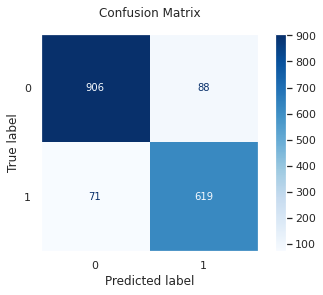

In [131]:
# Components = all
# Setting alpha = 100
# Standardization - VIF dataset
Xs_train, Xs_test = Standardization(Xv64_train, Xv64_test)
# LDA
Xs_train, Xs_test = Lda(Xs_train, Xs_test, yv64_train)
# BernoulliNB
BernoulliClass(Xs_train, Xs_test, yv64_train, yv64_test, a = 100)

Predictions

   Actual Values  Predicted Values
0              0                 0
1              0                 0
2              0                 0
3              1                 1
4              0                 0

**********************************************************************


Mean = 0.5144718208540914
Weighted F1 Score: 0.905749250395327

**********************************************************************

Classification report

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       994
           1       0.88      0.90      0.89       690

    accuracy                           0.91      1684
   macro avg       0.90      0.90      0.90      1684
weighted avg       0.91      0.91      0.91      1684


**********************************************************************



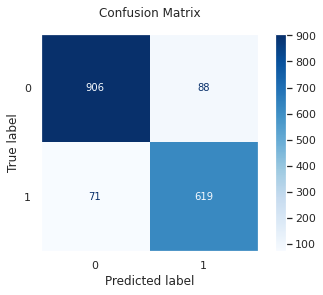

In [132]:
# Components = all
# Setting alpha = 1000
# Standardization - VIF dataset
Xs_train, Xs_test = Standardization(Xv64_train, Xv64_test)
# LDA
Xs_train, Xs_test = Lda(Xs_train, Xs_test, yv64_train)
# BernoulliNB
BernoulliClass(Xs_train, Xs_test, yv64_train, yv64_test, a = 1000)

Increasing the alpha values does not change the model performance. This observation is consistent with the alpha values vs accuracy plot, where the high accuracy value of above 90% is consistent up to around and alpha value of 1800. Therefore, the model does not require smoothing.

## 7. Implementing the Solution

Predicting the email type for the last 10 records as dummy values will be difficult to implement as there is limited information about the dataset features.

Predictions

   Actual Values  Predicted Values
0              0                 0
1              0                 0
2              0                 0
3              0                 0
4              0                 0
5              0                 0
6              0                 0
7              0                 0
8              0                 0
9              0                 0

**********************************************************************

Weighted F1 Score: 1.0

**********************************************************************

Classification report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10


**********************************************************************



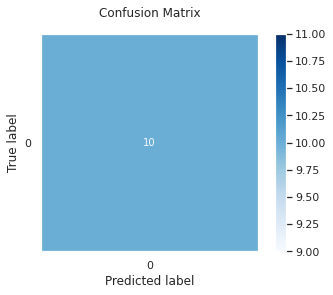

In [133]:
# Train-test-split
X_train = spam_vif.drop('1', 1).iloc[:-10 , :].values
X_test = spam_vif.drop('1', 1).tail(10).values
y_train = spam['1'].iloc[:-10].values.reshape(-1, 1)
y_test = spam['1'].iloc[-10:].values.reshape(-1, 1)
# Standardization - VIF dataset
X_train, X_test = Standardization(X_train, X_test)
# LDA
X_train, X_test = Lda(X_train, X_test, y_train)
# BernoulliNB
BernoulliClass_Actual_Pred(X_train, X_test, y_train, y_test, a = 0.0)

The model was able to accurately predict the last 10 records (values that have never been seen by the model) with 100% accuracy.

## 8. Challenging the Solution

1. Two datasets were used to fit the models. The dataset with the high VIF columns dropped led to attaining a higher model accuracy than the former.

2. Three Naive Bayes algorithms were used, of the three, the BernoulliNB algorithm had the highest accuracy.

3. Three train - test splits were performed. The 60 - 40 train test split led to a the highest model accuracy after model fitting and prediction.

4. Applying LDA increased the performance of the BernoulliNB model by 1%, to 91% accuracy.

5. Different smoothing values were applied, an accuracy of 91% was maintained upto alpha = 2,000. After hyperparameter tuning, alpha of 0 was selected, indicating that the model fdid not need smoothing.

## 9. Conclusion

The words present in most spam emails are '3d', 'credit', 'font', 'free', 'money', 'you', 'your' and 'internet' while the most frequently used characters in spam emails are '#' and '('.

The BernoulliNB algorithm attained a high prediction accuracy of 91% after optimization. High weigted F1 scores > 0.9 were also attained. Therefore, previously set success criteria have been met.


## 10. Follow Up Questions

### a). Did we have the right data?

Yes, as the features contained word frequencies, which when trained on the BernoulliNB algorithm, resulted in a high model accuarcy of 91%.

### b). Do we need other data to answer our question?

Data with additional and relevant features (word frequencies) could be used to try and improve the model's filtering accuracy.

### c). Did we have the right question?

Yes, we have the right question as the features, are sufficient and necessary in predicting/filtering emial messages. Furthermore, the model optimized to answer this question attained a high accuracy 0f 91%.